In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\data_science_datasets\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
#attrition

left = df[df.left==1]
left.shape

(3571, 10)

In [7]:
retained = df[df.left==0]
retained.shape

(11428, 10)

left/total People *100

In [8]:
#23% people Left the org
3571/14999 * 100

23.80825388359224

In [9]:
df.groupby("left").mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Analysis 
1) satisfaction level is low for employees who left 
2) num of projects were condiderable higher for employees who left
3) avg monthly hours where 4.02% higher than retained employees
4) promotion were considerable for higher employees who left 

<Axes: xlabel='salary'>

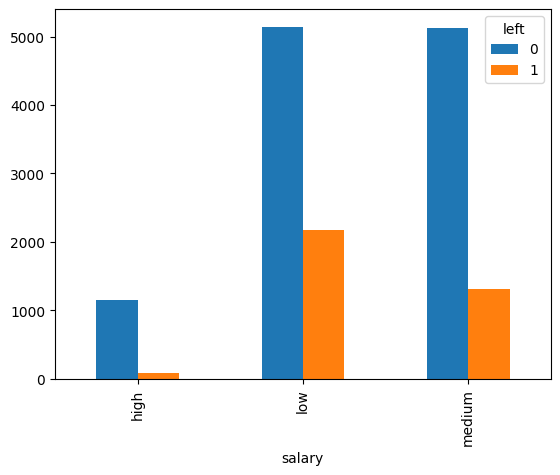

In [10]:
#salary on reltetion

pd.crosstab(df.salary,df.left).plot(kind='bar')

In [11]:
df.rename({"sales":"department"},inplace=True)

<Axes: xlabel='sales'>

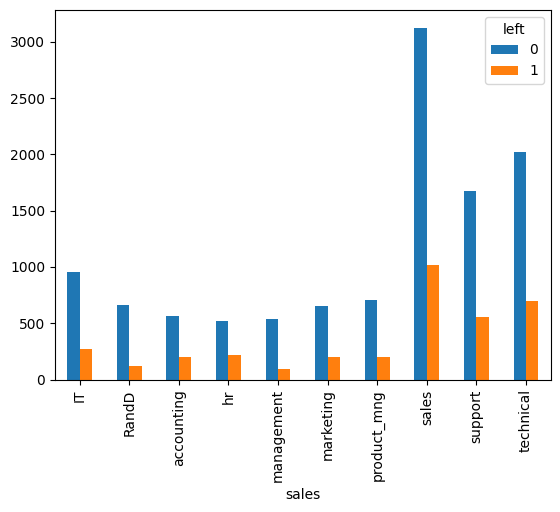

In [12]:
pd.crosstab(df.sales,df.left).plot(kind="bar")

<Axes: xlabel='sales'>

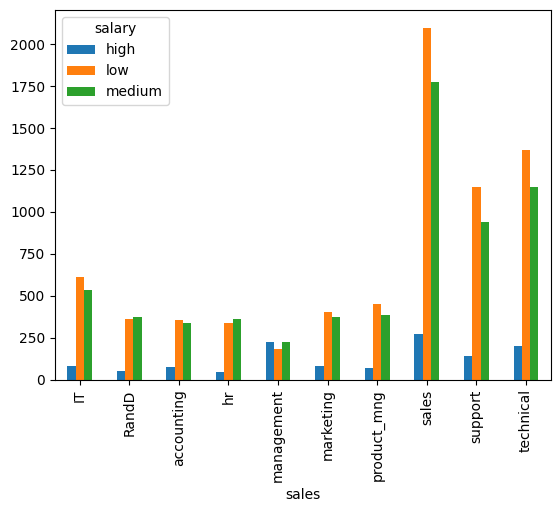

In [13]:
pd.crosstab(df.sales,df.salary).plot(kind="bar")

In [14]:
#Main Criteria
subdf = df[["satisfaction_level","average_montly_hours","promotion_last_5years","salary"]]
subdf.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [15]:
#encoding the salary column
salary_dummies = pd.get_dummies(subdf.salary,prefix='salary').astype(int)

In [16]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [17]:
df_with_dummies.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [18]:
df_with_dummies.drop(['salary'],axis="columns",inplace=True)

In [19]:
df_with_dummies.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [20]:
X = df_with_dummies
X.head(5)

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [21]:
Y = df.left
Y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [24]:
model.fit(X_train,Y_train)

LogisticRegression()

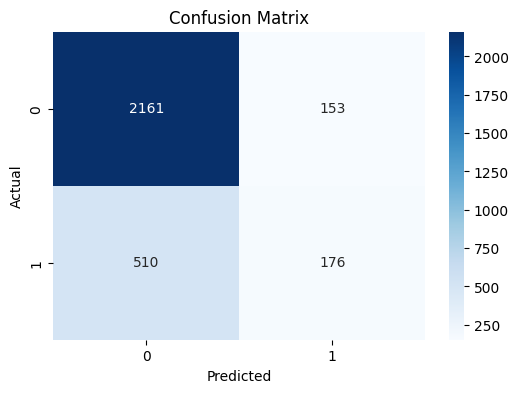

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# 1. Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:

# 2. Classification Report
print("Classification Report:")
print(classification_report(Y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2314
           1       0.53      0.26      0.35       686

    accuracy                           0.78      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.75      0.78      0.75      3000



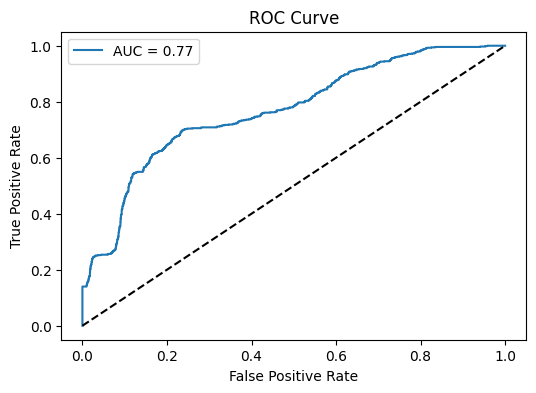

ROC-AUC Score: 0.77


In [27]:
# 3. ROC Curve and AUC Score
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)
auc_score = roc_auc_score(Y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0,1], [0,1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"ROC-AUC Score: {auc_score:.2f}")

In [28]:
X_test[12:13]

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
14171,0.82,198,0,0,1,0


In [29]:
Y_test[12:13]

14171    0
Name: left, dtype: int64

In [30]:
model.predict(X_test[12:13])

array([0])

In [31]:
model.predict_proba(X_test[12:13])

array([[0.86152004, 0.13847996]])

In [32]:
model.score(X_test,Y_test)

0.779

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2314
           1       0.53      0.26      0.35       686

    accuracy                           0.78      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.75      0.78      0.75      3000



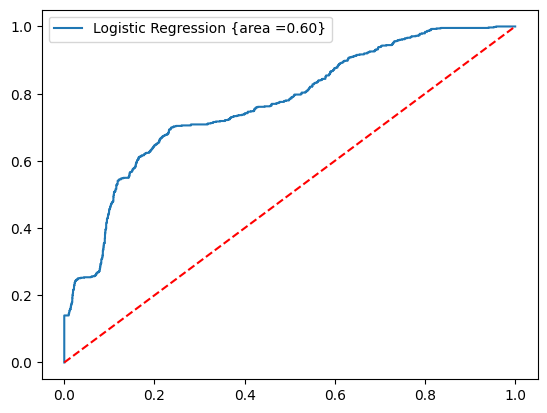

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test,model.predict(X_test))
fpr,tpr,thresholds = roc_curve(Y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression {area =%0.2f}'% logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 'best')